In [ ]:
#SET MODEL GLOBALLY

model = 'General'
mode = 'Cross_Validation'
seed = 42

# splitting parameters
step_ratio = 0.1
ratio = 0.2

NUM_FOLDS = 5
save = True

# Automated Workflow Code


In [ ]:
#--------------------

root_dir='/content/drive/MyDrive/MRSA datasets'
augmented=root_dir+'/Metadata Tables/Experimental Labels Augmented'
experimental=root_dir+'/Metadata Tables/Experimental Labels'
predicted=root_dir+'/Metadata Tables/Predicted Labels'
hmology = root_dir + '/Homology_splitting'
table_dir = root_dir + '/Tables/Models Tables'
species_files= {
    'Salmonella': '/Salmonella enterica_Model_Table.csv',
    'Staphylococcus': '/Staphylococcus aureus_Model_Table.csv',
    'Pneumoniae': '/Klebsiella pneumoniae_Model_Table.csv',
    'Ecoli': '/Escherichia coli_Model_Table.csv',
    'Tuberculosis': '/Mycobacterium tuberculosis_Model_Table.csv',
    # 'Klebsiella': '/Klebsiella pneumoniae_Model_Table.csv',
    'Acinetobacter': '/Acinetobacter baumannii_Model_Table.csv',
    'General': '/General_Model_Table.csv'
}

#-------------------


model_hyperparameters_dict={
    "Salmonella":{
        "Augmented":{'table_location':augmented+species_files["Salmonella"], 'Epochs':19,'batch_size':32},
        "Experimental":{'table_location':experimental+species_files["Salmonella"], 'Epochs':19,'batch_size':32},
        "Predicted":{'table_location':predicted+species_files["Salmonella"], 'Epochs':19,'batch_size':32},
        "Homology":{'table_location':hmology+species_files["Salmonella"][:-4] + '_clusters.csv', 'Epochs':19,'batch_size':32},
        "Cross_Validation":{'table_location':table_dir+species_files["Salmonella"][:-4] + '_clusters.csv', 'Epochs':19,'batch_size':32},
    },
    "Staphylococcus":{
        "Augmented":{'table_location':augmented+species_files["Staphylococcus"], 'Epochs':20,'batch_size':32},
        "Experimental":{'table_location':experimental+species_files["Staphylococcus"], 'Epochs':20,'batch_size':32},
        "Predicted":{'table_location':predicted+species_files["Staphylococcus"], 'Epochs':20,'batch_size':32},
        "Homology":{'table_location':hmology+species_files["Staphylococcus"][:-4] + '_clusters.csv', 'Epochs':20,'batch_size':32},
        "Cross_Validation":{'table_location':table_dir+species_files["Staphylococcus"][:-4] + '_clusters.csv', 'Epochs':20,'batch_size':32},
    },
    "Pneumoniae":{
        "Augmented":{'table_location':augmented+species_files["Pneumoniae"], 'Epochs':19,'batch_size':16},
        "Experimental":{'table_location':experimental+species_files["Pneumoniae"], 'Epochs':19,'batch_size':16},
        "Predicted":{'table_location':predicted+species_files["Pneumoniae"], 'Epochs':19,'batch_size':16},
    },
    "Ecoli":{
        "Augmented":{'table_location':augmented+species_files["Ecoli"], 'Epochs':19,'batch_size':32},
        "Experimental":{'table_location':experimental+species_files["Ecoli"], 'Epochs':19,'batch_size':32},
        "Predicted":{'table_location':predicted+species_files["Ecoli"], 'Epochs':19,'batch_size':32},
        "Homology":{'table_location':hmology+species_files["Ecoli"][:-4] + '_clusters.csv', 'Epochs':19,'batch_size':32},
        "Cross_Validation":{'table_location':table_dir+species_files["Ecoli"][:-4] + '_clusters.csv', 'Epochs':19,'batch_size':32},
    },
    "Tuberculosis":{
        "Augmented":{'table_location':augmented+species_files["Tuberculosis"], 'Epochs':25,'batch_size':16},
        "Experimental":{'table_location':experimental+species_files["Tuberculosis"], 'Epochs':25,'batch_size':16},
        "Predicted":{'table_location':predicted+species_files["Tuberculosis"], 'Epochs':25,'batch_size':16},
    },

    # "Klebsiella":{
    #     "Augmented":{'table_location':augmented+species_files["Klebsiella"], 'Epochs':19,'batch_size':32},
    #     "Experimental":{'table_location':experimental+species_files["Klebsiella"], 'Epochs':19,'batch_size':32},
    #     "Predicted":{'table_location':predicted+species_files["Klebsiella"], 'Epochs':19,'batch_size':32},
    # },

    "Acinetobacter":{
        "Augmented":{'table_location':augmented+species_files["Acinetobacter"], 'Epochs':19,'batch_size':8},
        "Experimental":{'table_location':experimental+species_files["Acinetobacter"], 'Epochs':19,'batch_size':8},
        "Predicted":{'table_location':predicted+species_files["Acinetobacter"], 'Epochs':19,'batch_size':8},
    },
    "General":{
        "Augmented":{'table_location':augmented+species_files["General"], 'Epochs':50,'batch_size':64},
        "Experimental":{'table_location':experimental+species_files["General"], 'Epochs':50,'batch_size':64},
        "Predicted":{'table_location':predicted+species_files["General"], 'Epochs':50,'batch_size':64},
        "Homology":{'table_location':hmology+species_files["General"][:-4] + '_clusters.csv', 'Epochs':50,'batch_size':64},
        "Cross_Validation":{'table_location':table_dir+species_files["General"][:-4] + '_clusters.csv', 'Epochs':30,'batch_size':64},
    },
}

In [ ]:
param_dict=model_hyperparameters_dict[model][mode]

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/MRSA\ datasets


Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/13LGqe__ULhjG0hZmpgxz8WqE0fNXsVNQ/MRSA datasets


In [ ]:

import os
root_models_dir='/content/drive/MyDrive/MRSA datasets/Models'

# Map mode to its corresponding subfolder under Models/
MODE_SUBDIRS = {
    'Augmented': 'Experimental Labels Augmented',
    'Experimental': 'Experimental Labels',
    'Predicted': 'Predicted Labels',
    'Homology' : 'Homology Splitting',
    'Cross_Validation' : 'Cross Validation'
}

# Utility: ensure unique filename (_1, _2, ...)
def unique_filename(directory, filename):
    """
    Return a filename within `directory` that doesn’t collide with existing files.
    Appends _1, _2, ... before the extension if needed.
    """
    base, ext = os.path.splitext(filename)
    candidate = filename
    counter = 1
    while os.path.exists(os.path.join(directory, candidate)):
        candidate = f"{base}_{counter}{ext}"
        counter += 1
    return candidate


def get_save_paths(model, mode, best_acc, hyperparams, root_models_dir):
    """
    Generate full, unique file paths for saving a PyTorch model and its metrics CSV,
    placing them in a subdirectory of `root_models_dir` determined by `mode`.

    Args:
        model: species key (e.g., 'Salmonella').
        mode: one of 'Augmented', 'Experimental', 'Predicted'.
        best_acc: best accuracy (0.0–1.0) or None if unknown.
        hyperparams: nested dict mapping species -> mode -> {'epochs', 'batch_size'}.
        root_models_dir: path to Models directory. Inside this, subfolders exist as:
            'Experimental Labels', 'Experimental Labels Augmented', 'Predicted Labels'.

    Returns:
        (model_path, metrics_path): full paths to saved .pth and .csv files.
    """
    # Determine save folder
    if mode not in MODE_SUBDIRS:
        raise ValueError(f"Unknown mode '{mode}'; choose from {list(MODE_SUBDIRS)}.")
    save_dir = os.path.join(root_models_dir, MODE_SUBDIRS[mode])
    os.makedirs(save_dir, exist_ok=True)

    # Get hyperparameters for this model/mode
    params = hyperparams[model][mode]
    epochs = params['Epochs']
    batch_size = params['batch_size']

    # Build model filename, include accuracy if provided
    if best_acc is not None:
        acc_pct = int(round(best_acc * 100))
        acc_part = f"_acc{acc_pct}"
    else:
        acc_part = ""

    model_base = f"{model}{acc_part}_batch{batch_size}_epoch{epochs}"
    metrics_base = f"{model}_{mode}_metrics.csv"

    # Build metrics filename



    # Ensure filenames are unique in save_dir
    model_filename = unique_filename(save_dir, model_base)
    if mode == 'Cross_Validation':
        metrics_filename = unique_filename(os.path.join(save_dir, model_filename), metrics_base)
    else:
        metrics_filename = unique_filename(save_dir, metrics_base)

    # Return full paths
    model_path = os.path.join(save_dir, model_filename)
    if mode == 'Cross_Validation':
        metrics_path = os.path.join(save_dir, model_filename, metrics_filename)
    else:
        metrics_path = os.path.join(save_dir, metrics_filename)

    return model_path, metrics_path


Parameters

In [ ]:
BATCH_SIZE =param_dict['batch_size']
EPOCHS=param_dict['Epochs']
TABLE=param_dict['table_location']

In [ ]:
isGeneral = model == 'General'

In [ ]:
import os
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor
from torch.utils.data import Dataset, DataLoader, Subset, random_split, WeightedRandomSampler

import torchvision.transforms as transforms
from torchvision import datasets, models
from torchvision.transforms import ToTensor, Lambda

from fastai.data.all import *
from fastai.vision.all import *
from fastai.metrics import FBetaMulti
from fastai.learner import Callback

import timm
import joblib
import torch.fft
from collections import OrderedDict
from numpy import load
from sklearn.model_selection import GroupKFold
from collections import defaultdict
from sklearn.model_selection import StratifiedGroupKFold

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
random.seed(seed)

# Data Preparation

In [ ]:
import os
import shutil

# 1. Paths
src_dir   = '/content/drive/MyDrive/MRSA datasets/Datasets_fcgr'
zip_base  = '/content/drive/MyDrive/MRSA datasets/Datasets_fcgr'
zip_path  = f'{zip_base}.zip'               # full path to source ZIP in Drive
dest_dir  = '/content/'
dest_path = os.path.join(dest_dir, os.path.basename(zip_path))  # where we want it locally

# 2. If we haven't already copied it...
if not os.path.exists(dest_path):
    # 2a. Create the ZIP on Drive if it doesn't exist
    if not os.path.exists(zip_path):
        print(f'📦 Creating archive at "{zip_path}"…')
        shutil.make_archive(zip_base, 'zip', src_dir)
    else:
        print(f'✅ Source archive already exists at "{zip_path}".')

    # 2b. Copy it into /content/
    print(f'➡️ Copying archive to "{dest_dir}"…')
    shutil.copy(zip_path, dest_path)
    print(f'✅ Archive copied to "{dest_path}".')

else:
    print(f'🚫 Archive already present at "{dest_path}", skipping.')


✅ Source archive already exists at "/content/drive/MyDrive/MRSA datasets/Datasets_fcgr.zip".
➡️ Copying archive to "/content/"…
✅ Archive copied to "/content/Datasets_fcgr.zip".


In [ ]:
import os

if not os.path.isdir('/content/Datasets_fcgr'):
    # this line will run as shell command
    get_ipython().system('unzip /content/Datasets_fcgr.zip -d /content/Datasets_fcgr')
else:
    print("Already unzipped, skipping.")


Streaming output truncated to the last 5000 lines.
  inflating: /content/Datasets_fcgr/Mycobacterium tuberculosis/PRJNA343736/SAMN06010468.fna.npy  
  inflating: /content/Datasets_fcgr/Mycobacterium tuberculosis/PRJNA343736/SAMN06010408.fna.npy  
  inflating: /content/Datasets_fcgr/Mycobacterium tuberculosis/PRJNA343736/SAMN06010326.fna.npy  
  inflating: /content/Datasets_fcgr/Mycobacterium tuberculosis/PRJNA343736/SAMN06010337.fna.npy  
  inflating: /content/Datasets_fcgr/Mycobacterium tuberculosis/PRJNA343736/SAMN06010435.fna.npy  
  inflating: /content/Datasets_fcgr/Mycobacterium tuberculosis/PRJNA343736/SAMN06010387.fna.npy  
  inflating: /content/Datasets_fcgr/Mycobacterium tuberculosis/PRJNA343736/SAMN06010327.fna.npy  
  inflating: /content/Datasets_fcgr/Mycobacterium tuberculosis/PRJNA343736/SAMN06010422.fna.npy  
  inflating: /content/Datasets_fcgr/Mycobacterium tuberculosis/PRJNA343736/SAMN06010482.fna.npy  
  inflating: /content/Datasets_fcgr/Mycobacterium tuberculosis/PRJN

In [ ]:
%cp -r '/content/drive/MyDrive/MRSA datasets/Metadata Tables/' '/content/'

cp: cannot open '/content/drive/MyDrive/MRSA datasets/Metadata Tables/Experimental Labels/Salmonella enterica_Model_Table.gsheet' for reading: Operation not supported
cp: cannot open '/content/drive/MyDrive/MRSA datasets/Metadata Tables/Experimental Labels/Staphylococcus aureus_Model_Table.gsheet' for reading: Operation not supported
cp: cannot open '/content/drive/MyDrive/MRSA datasets/Metadata Tables/Experimental Labels/Escherichia coli_Model_Table.gsheet' for reading: Operation not supported
cp: cannot open '/content/drive/MyDrive/MRSA datasets/Metadata Tables/Experimental Labels/Mycobacterium tuberculosis_Model_Table.gsheet' for reading: Operation not supported
cp: cannot open '/content/drive/MyDrive/MRSA datasets/Metadata Tables/Experimental Labels/Klebsiella pneumoniae_Model_Table.gsheet' for reading: Operation not supported
cp: cannot open '/content/drive/MyDrive/MRSA datasets/Metadata Tables/Experimental Labels/Acinetobacter baumannii_Model_Table.gsheet' for reading: Operation 

# Model

In [ ]:
# ---------- Dataset Class ---------- #

class GeneticFCGRDataset(Dataset):
    def __init__(self, root_dir, dataset_dir, table_dir, transform = None):
      self.root_dir = root_dir
      self.dataset_dir = root_dir + dataset_dir
      self.get_fcgr_data = lambda df, x: load(root_dir + dataset_dir +'/' + df['Species'][x] + '/' + df['Dataset'][x] + '/' + df['File Name'][x] + '.npy')
      self.transform = transform
      self.labels_map = {'R': 0, 'I': 0, 'S': 1, np.nan: -1}
      # self.labels_map = {'R': 1, 'I': 1, 'S': 0, np.nan: -1}
      self.Master_Table = pd.read_csv( table_dir)

      labels = self.Master_Table.iloc[:, 3:-1]
      labels = labels.apply(lambda x: x.map(self.labels_map), axis = 1)
      labels = labels.apply(pd.to_numeric, errors = 'coerce').fillna(-1)
      self.labels_tensor = torch.tensor(labels.values, dtype = torch.float32)

      self.clusters = self.Master_Table['clusters'].tolist()
      self.label_cols = labels.columns.tolist()


    def __getitem__(self, idx):

      labels = self.labels_tensor[idx]
      fcgr_data = self.get_fcgr_data(self.Master_Table, idx)
      if self.transform:
          fcgr_data = self.transform(fcgr_data)

      return fcgr_data, labels


    def __len__(self):
      return len(self.Master_Table)

In [ ]:
# ---------- General Model Dataloader ---------- #
class MultiSpeciesFCGRDataset(Dataset):
    def __init__(self, root_dir, dataset_dir, table_path, transform=None):
        root_dir = str(root_dir).rstrip('/')
        dataset_dir = str(dataset_dir).lstrip('/')
        self.dataset_dir = os.path.join(root_dir, dataset_dir)
        self.Master_Table = pd.read_csv(table_path)
        self.transform = transform
        self.species_list = self.Master_Table['Species'].unique().tolist()
        self.species_to_idx = {s:i for i,s in enumerate(self.species_list)}

        self.clusters = self.Master_Table['clusters'].tolist()
        self.species = self.Master_Table['Species'].tolist()

        self.labels_map = {'R': 0, 'I': 0, 'S': 1, np.nan: -1}

        labels = self.Master_Table.iloc[:, 3:-1]
        labels = labels.apply(lambda x: x.map(self.labels_map), axis = 1)
        labels = labels.apply(pd.to_numeric, errors = 'coerce').fillna(-1)
        self.labels_tensor = torch.tensor(labels.values, dtype = torch.float32)

    def __getitem__(self, idx):
        row = self.Master_Table.iloc[idx]
        path = os.path.join(
            self.dataset_dir,
            str(row['Species']),
            str(row['Dataset']),
            f"{row['File Name']}.npy"
        )
        x = load(path)
        if self.transform:
            x = self.transform(x)
        y = self.labels_tensor[idx]
        sp = self.species_to_idx[row['Species']]
        return x, (y, sp)  # species as integer index

    def __len__(self):
        return len(self.Master_Table)

In [ ]:
# ---------- Transforms ---------- #

class AddRandomIntegerNoise:
    def __init__(self, low, high):
        self.low = low
        self.high = high

    def __call__(self, tensor):
        noise = torch.randint(self.low, self.high, tensor.size(), dtype=torch.int64)
        return tensor + noise


class MinMaxNormalize:
    def __init__(self, new_min=0.0, new_max=1.0):
        self.new_min = new_min
        self.new_max = new_max

    def __call__(self, tensor):
        min_val = tensor.min()
        max_val = tensor.max()
        if max_val - min_val == 0:
            return tensor
        return (tensor - min_val) / (max_val - min_val) * (self.new_max - self.new_min) + self.new_min

class ToTensorNoScale:
    def __call__(self, array: np.ndarray) -> torch.Tensor:
        return torch.from_numpy(array.astype(np.float32)).unsqueeze(0)

class StandardNormalize:
    def __call__(self, tensor: torch.Tensor) -> torch.Tensor:
        mean = tensor.mean()
        std  = tensor.std()
        if std == 0:
            return tensor
        return (tensor - mean) / std

class ResizeTensor:
    "Resize a C×H×W tensor to C×new_h×new_w using bilinear"
    def __init__(self, size):
        self.size = size  # e.g. (299,299)
    def __call__(self, t: torch.Tensor):
        # assume t is C×H×W
        t = t.unsqueeze(0)   # → 1×C×H×W
        t = F.interpolate(t, size=self.size, mode='bilinear', align_corners=False)
        return t.squeeze(0)  # → C×new_h×new_w

transform = transforms.Compose([
    ToTensorNoScale(),
    ResizeTensor((299, 299)),   
    MinMaxNormalize(),
])


transform = transforms.Compose( [
    ToTensorNoScale(),
    # transforms.RandomApply([ AddRandomIntegerNoise(low=0, high=10) ], p=0.1), # Low probability of adding noise
    #transforms.Lambda(lambda x: torch.log10(x + 1e-6)), # log normalization
    #StandardNormalize(),
    # transforms.Normalize(mean = [0.5], std = [0.5])
    MinMaxNormalize(),
    # ResizeTensor((299, 299)),     #used with Xception Net
    #DCT2DTransform()
  ]
)

In [ ]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
architecture = "-"

In [ ]:
# ---------- Model ResNet ---------- #

def create_resnet(NUM_CLASSES, in_channels=1, pretrained=False):
    global architecture
    architecture = 'ResNet'
    model = models.resnet18(weights=None)
    # model = models.resnet34(weights=None)

    orig = model.conv1
    model.conv1 = nn.Conv2d(
        in_channels=1,
        out_channels=orig.out_channels,
        kernel_size=orig.kernel_size,
        stride=orig.stride,
        padding=orig.padding,
        bias=orig.bias is not None
    )

    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, NUM_CLASSES)

    return model


In [ ]:
# ---------- Model Xception ---------- #

def create_xception(NUM_CLASSES, in_channels=1, pretrained=True):
    """
    Create an Xception model modified for arbitrary in_channels and NUM_CLASSES.

    Args:
        NUM_CLASSES (int): Number of output classes.
        in_channels (int): Number of input channels (default 1).
        pretrained (bool): If True, load ImageNet pre-trained weights.

    Returns:
        model (nn.Module): Modified Xception model.
    """
    global architecture
    architecture = 'Xception'
    # Load the pre-trained Xception model
    model = timm.create_model('xception', pretrained=pretrained)

    # Modify the first convolutional layer to accept in_channels
    if in_channels != 3:
        # Get the existing first conv layer
        old_conv = model.conv1
        # Create a new conv layer with the desired in_channels
        new_conv = nn.Conv2d(
            in_channels=in_channels,
            out_channels=old_conv.out_channels,
            kernel_size=old_conv.kernel_size,
            stride=old_conv.stride,
            padding=old_conv.padding,
            bias=old_conv.bias is not None
        )
        # Initialize weights
        if pretrained:
            if in_channels == 1:
                # Average weights across the RGB channels
                new_conv.weight.data = old_conv.weight.data.mean(dim=1, keepdim=True)
            else:
                # Repeat or interpolate weights as needed
                new_conv.weight.data = old_conv.weight.data[:, :in_channels, :, :]
        model.conv1 = new_conv

    # Replace the final fully connected layer
    in_features = model.get_classifier().in_features
    model.fc = nn.Linear(in_features, NUM_CLASSES)

    return model


In [ ]:
# ---------- Model EfficientNet ---------- #

def create_efficientnet(NUM_CLASSES, in_channels=1, pretrained=False, version='b0'):
    global architecture
    architecture = 'EfficientNet'
    # Select version
    model_fn = getattr(models, f'efficientnet_{version}')
    model = model_fn(weights='DEFAULT' if pretrained else None)

    # Modify first conv layer for grayscale input
    orig_conv = model.features[0][0]
    model.features[0][0] = nn.Conv2d(
        in_channels=in_channels,
        out_channels=orig_conv.out_channels,
        kernel_size=orig_conv.kernel_size,
        stride=orig_conv.stride,
        padding=orig_conv.padding,
        bias=orig_conv.bias is not None
    )

    # Replace classifier
    in_features = model.classifier[1].in_features
    model.classifier[1] = nn.Linear(in_features, NUM_CLASSES)

    return model

## Random Cluster Split

In [ ]:
splitting = 'random_cluster'

In [ ]:
table_df = pd.read_csv(TABLE)
table_df['row_index'] = table_df.index



def get_clusters_labels(df, i):
    cluster = df[df['clusters'] == i]
    return ((cluster == 'S').sum()).tolist()[:-1], ((cluster == 'R').sum()).tolist()[:-1], len(cluster)

def split_function(clusters, clusters_size, ratio = 0.2):
    cluster_counts = pd.Series(clusters_size).value_counts().sort_index()
    step = int(len(cluster_counts) * step_ratio)
    clusters_copy = clusters.copy()
    clusters_groups = defaultdict(list)
    for i in range(step,len(cluster_counts) - step, step):
        for key, values in list(clusters_copy.items()):
            if len(values) < cluster_counts.index[i]:
                clusters_groups[i/step].append(key)
                clusters_copy.pop(key, None)
    test_clusters = []

    for key, values in clusters_groups.items():
        random.seed(seed)
        torch.manual_seed(seed)
        test_clusters.extend(random.sample(clusters_groups[key], k = max(int(len(values)*ratio), 1)))
    train_clusters = [c for c in clusters.keys() if c not in test_clusters]
    return train_clusters, test_clusters

def check_label_coverage(indices):
    labels = []

    for i in indices:
        data = Dataset[i][1]

        # Handle case where label is (label_tensor, species_tensor)
        if isinstance(data, tuple) and len(data) == 2:
            label_tensor = data[0]
        else:
            label_tensor = data

        # Convert to NumPy array
        label_array = label_tensor.numpy() if isinstance(label_tensor, torch.Tensor) else label_tensor
        labels.append(label_array)

    # Convert list of label arrays to a stacked NumPy array
    labels = np.stack(labels)

    coverage = []
    for i in range(labels.shape[1]):
        zeros = np.sum(labels[:, i] == 0)
        ones = np.sum(labels[:, i] == 1)
        coverage.append((zeros, ones))

    return coverage

In [ ]:
def save_split_statistics(train_indices, test_indices,
                         train_clusters, test_clusters, dataset_size, check_label_coverage_fn, model_name):
    global architecture
    os.makedirs(model_name, exist_ok=True)
    filepath = os.path.join(model_name, f"stats.txt")

    train_pct = len(train_indices) / dataset_size * 100
    test_pct = len(test_indices) / dataset_size * 100

    with open(filepath, 'w') as f:
        f.write(f"{'Train samples:' :<20} {len(train_indices)} ({train_pct:.2f}%)\n")
        f.write(f"{'Test samples:':<20} {len(test_indices)} ({test_pct:.2f}%)\n\n")

        f.write(f"{'Train clusters:':<20} {len(set(train_clusters))}\n")
        f.write(f"{'Test clusters:':<20}  {len(set(test_clusters))}\n\n")

        f.write("Label coverage in test set:\n")
        test_coverage = check_label_coverage_fn(test_indices)
        for idx, (zeros, ones) in enumerate(test_coverage):
            f.write(f"Label {idx}: Resistant (0) = {zeros}, Sensitive (1) = {ones}\n")
        f.write("Label coverage in train set:\n")
        train_coverage = check_label_coverage(train_indices)
        for idx, (zeros, ones) in enumerate(train_coverage):
            f.write(f"Label {idx}: Resistant (0) = {zeros}, Sensitive (1) = {ones}\n")


    print(f"Statistics saved to: {filepath}")

    fig, ax = plt.subplots(1, 2, figsize=(18, 4))
    converage = [test_coverage, train_coverage]
    sets_names = ['Test', 'Train' ]

    for i in range(2):
        labels = [f"{i}" for i in range(len(converage[i]))]
        resistant_counts = [zeros for zeros, _ in converage[i]]
        sensitive_counts = [ones for _, ones in converage[i]]

        x = np.arange(len(labels))  # label locations
        width = 0.35

        bars1 = ax[i].bar(x - width/2, resistant_counts, width, label='Resistant (0)', color='#8E6998')
        bars2 = ax[i].bar(x + width/2, sensitive_counts, width, label='Sensitive (1)', color='#44A5C2')

        max_height = max(resistant_counts + sensitive_counts)
        ax[i].set_ylim(0, max_height * 1.15)

        ax[i].set_xlabel('Labels')
        ax[i].set_ylabel('Count')
        ax[i].set_title(f'Label Coverage in {sets_names[i]} Set')
        ax[i].set_xticks(x)
        ax[i].set_xticklabels(labels)
        ax[i].legend()

        for bar in bars1 + bars2:
            height = bar.get_height()
            ax[i].annotate(f'{height}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    plt.tight_layout()
    png_save_path = os.path.join(model_name, f'{architecture}_label_coverage_fold.png')
    plt.savefig(png_save_path, dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
if isGeneral:
    # General model
    dfs = []
    for s in table_df['Species'].unique():
          dfs.append(table_df[table_df['Species'] == s])

    clusters_species = []
    clusters_sizes_species =[]

    for df in dfs:
        clusters_column = table_df['clusters'].tolist()
        clusters = defaultdict(list)
        for i in range(len(table_df)):
            clusters[clusters_column[i]].append(i)
        clusters_species.append(clusters)

        clusters = {}
        for c in df['clusters'].unique():
            _, _, count = get_clusters_labels(table_df[table_df.columns[3:]], c)
            clusters[c] = count
        clusters_sizes_species.append(clusters)

        train_clusters = []
        test_clusters = []
        for i in range(len(clusters_species)):
            train, test = split_function(clusters_species[i], clusters_sizes_species[i])
            train_clusters.extend(train)
            test_clusters.extend(test)
else:
    # Species Models
    clusters_column = table_df['clusters'].tolist()
    clusters = defaultdict(list)
    for i in range(len(table_df)):
        clusters[clusters_column[i]].append(i)


    clusters_size = {}

    for c in table_df['clusters'].unique():
        _, _, count = get_clusters_labels(table_df[table_df.columns[3:]], c)
        clusters_size[c] = count

    train_clusters, test_clusters = split_function(clusters, clusters_size)


## Weights for classes imbalances

In [ ]:
# ---------- Weights for Class Imbalances ---------- #
def get_pos_weights(train_dataset, this_device = device):
    train_targets = [label for _, label in train_dataset]  # Get all labels

    train_targets_tensor = torch.stack(train_targets).float()
    positive_counts = (train_targets_tensor == 1).sum(dim=0)
    negative_counts = (train_targets_tensor == 0).sum(dim=0)
    # pos_weights = positive_counts / negative_counts
    pos_weights = negative_counts / positive_counts
    return pos_weights.to(this_device)

In [ ]:
def compute_weights_from_subset(subset, num_classes):
    """
    Compute per-species pos weights from a subset yielding (x, y, species_idx).
    Returns a matrix where each row corresponds to a species and each column corresponds to a class.
    """
    accum = {}
    base = subset.dataset if hasattr(subset, 'indices') else subset
    indices = subset.indices if hasattr(subset, 'indices') else range(len(base))

    # Accumulate labels for each species
    for idx in indices:
        _, yu = base[idx]
        y, sp = yu  # Assuming y is the label tensor and sp is the species index
        accum.setdefault(sp, []).append(y)

    # Create a matrix to store the weights
    pos_w_matrix = []

    # Calculate pos/neg weights for each species
    for s, ys_list in accum.items():
        ys = torch.stack(ys_list)  # Convert list of tensors to a single tensor
        pos = (ys == 1).sum(dim=0)  # Count positives (drug=1) for each class
        neg = (ys == 0).sum(dim=0).clamp_min(1)  # Count negatives (drug=0) for each class, clamp to avoid division by 0
        pos_w = (neg.float() / pos.float().clamp_min(1))  # Compute weight as neg/pos ratio
        pos_w_matrix.append(pos_w)  # Add to the pos_w_matrix

    # Convert the list of tensors to a matrix (num_species, num_classes)
    pos_w_matrix = torch.stack(pos_w_matrix)

    return pos_w_matrix

## Metric and loss Function

### Masked Metrics

In [ ]:
# ---------- Custom Metric ---------- #

from sklearn.metrics import (
    precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, jaccard_score, hamming_loss, matthews_corrcoef,
    average_precision_score # <-- Add this import
)

# ─── Global Configuration ─────────────────────────────────────────────────────
# If your model outputs raw logits, set USE_LOGITS = True and THRESH = 0.0
# If it outputs probabilities, set USE_LOGITS = False and THRESH = 0.5
USE_LOGITS = True
THRESH = 0.0 if USE_LOGITS else 0.5

# ─── Utility Functions ─────────────────────────────────────────────────────────
def _safe_divide(a: float, b: float) -> float:
    return a / b if b != 0 else 0.0


def safe_roc_auc(y_true, y_pred):
    if len(np.unique(y_true)) < 2:
        return 0.5
    try:
        return roc_auc_score(y_true, y_pred)
    except ValueError:
        return 0.5


def safe_mcc(y_true, y_pred):
    if len(np.unique(y_true)) < 2 or len(np.unique(y_pred)) < 2:
        return 0.0
    try:
        return matthews_corrcoef(y_true, y_pred)
    except ValueError:
        return 0.0


def safe_jaccard(y_true, y_pred):
    if len(np.unique(y_true)) < 2 and len(np.unique(y_pred)) < 2:
        return 1.0 if y_true[0] == y_pred[0] else 0.0
    try:
        return jaccard_score(y_true, y_pred, average='binary', zero_division=0)
    except ValueError:
        return 0.0

def safe_auprc(y_true, y_pred_prob):
    # AUPRC is well-defined even with one class, but let's be safe.
    if len(np.unique(y_true)) < 2:
        return 0.0 # Or np.nan, depending on how you want to handle it
    try:
        return average_precision_score(y_true, y_pred_prob)
    except ValueError:
        return 0.0

def _apply_threshold(logits: Tensor) -> Tensor:
    """
    Apply thresholding on raw logits or probabilities based on USE_LOGITS.
    Returns a Tensor of 0/1 predictions.
    """
    if USE_LOGITS:
        return (logits > THRESH).float()
    else:
        return (torch.sigmoid(logits) > THRESH).float()


def _masked_metric_per_class(
    inp: Tensor,
    targ: Tensor,
    metric_fn,
    beta: float = 2.0,
    is_prob: bool = False
) -> float:
    """
    Compute a masked metric per class, averaging over classes.
    If is_prob=True, pass probabilities to metric_fn (no threshold).
    Otherwise apply thresholding via _apply_threshold.
    """
    n_classes = inp.shape[1]
    scores = []
    for c in range(n_classes):
        mask = (targ[:, c] != -1)
        inp_c = inp[:, c][mask]
        targ_c = targ[:, c][mask]
        if len(targ_c) < 1:
            continue

        # determine predictions
        if is_prob:
            preds_c = torch.sigmoid(inp_c).cpu().numpy()
        else:
            preds_c = _apply_threshold(inp_c).cpu().numpy()
        targ_arr = targ_c.float().cpu().numpy()

        try:
            name = metric_fn.__name__
            if name == 'fbeta_score':
                score = metric_fn(targ_arr, preds_c, beta=beta, average='binary', zero_division=0)
            elif name in ['precision_score', 'recall_score', 'f1_score']:
                score = metric_fn(targ_arr, preds_c, average='binary', zero_division=0)
            else:
                score = metric_fn(targ_arr, preds_c)
            scores.append(score)
        except Exception:
            scores.append(0.0)
    return float(np.mean(scores)) if scores else 0.0


def make_named_metric(fn, name: str):
    fn.__name__ = name
    return fn

# ─── Metric Definitions ────────────────────────────────────────────────────────
MaskedAccuracyMulti = make_named_metric(
    lambda inp, targ: (
        _apply_threshold(inp[targ != -1]) == targ[targ != -1]
    ).float().mean().item(),
    "masked_acc"
)

MaskedPrecisionMulti = make_named_metric(
    lambda inp, targ: _masked_metric_per_class(inp, targ, precision_score),
    "masked_precision"
)

MaskedRecallMulti = make_named_metric(
    lambda inp, targ: _masked_metric_per_class(inp, targ, recall_score),
    "masked_recall"
)

MaskedF1ScoreMulti = make_named_metric(
    lambda inp, targ: _masked_metric_per_class(inp, targ, f1_score),
    "masked_f1"
)

MaskedFBetaMulti = make_named_metric(
    lambda inp, targ: _masked_metric_per_class(inp, targ, fbeta_score, beta=2.0),
    "masked_fbeta"
)

MaskedRocAucMulti = make_named_metric(
    lambda inp, targ: _masked_metric_per_class(inp, targ, safe_roc_auc, is_prob=True),
    "masked_auc"
)

MaskedJaccardMulti = make_named_metric(
    lambda inp, targ: _masked_metric_per_class(inp, targ, safe_jaccard),
    "masked_jaccard"
)

MaskedHammingLossMulti = make_named_metric(
    lambda inp, targ: hamming_loss(
        _apply_threshold(inp[targ != -1]).cpu().numpy(),
        targ[targ != -1].float().cpu().numpy()
    ),
    "masked_hamming"
)

MaskedMatthewsCorrCoefMulti = make_named_metric(
    lambda inp, targ: _masked_metric_per_class(inp, targ, safe_mcc),
    "masked_mcc"
)

MaskedAUPRCMulti = make_named_metric(
    lambda inp, targ: _masked_metric_per_class(inp, targ, safe_auprc, is_prob=True),
    "masked_auprc"
)


In [ ]:
def _masked_metric_per_class_detailed(
    inp: Tensor,
    targ: Tensor,
    metric_fn,
    beta: float = 2.0,
    is_prob: bool = False
) -> dict:
    """
    Compute a masked metric per class and return a dict of class -> score.
    """
    n_classes = inp.shape[1]
    per_class_scores = {}

    for c in range(n_classes):
        mask = (targ[:, c] != -1)
        inp_c = inp[:, c][mask]
        targ_c = targ[:, c][mask]
        if len(targ_c) < 1:
            per_class_scores[DRUGS[c]] = np.nan
            continue

        if is_prob:
            preds_c = torch.sigmoid(inp_c).cpu().numpy()
        else:
            preds_c = _apply_threshold(inp_c).cpu().numpy()
        targ_arr = targ_c.float().cpu().numpy()

        try:
            name = metric_fn.__name__
            if name == 'fbeta_score':
                score = metric_fn(targ_arr, preds_c, beta=beta, average='binary', zero_division=0)
            elif name in ['precision_score', 'recall_score', 'f1_score']:
                score = metric_fn(targ_arr, preds_c, average='binary', zero_division=0)
            else:
                score = metric_fn(targ_arr, preds_c)
            per_class_scores[DRUGS[c]] = score
        except Exception:
            per_class_scores[DRUGS[c]] = 0.0

    return per_class_scores

def masked_accuracy_per_class_detailed(inp: Tensor, targ: Tensor) -> dict:
    """
    Compute per-class masked accuracy.
    """
    n_classes = inp.shape[1]
    per_class_scores = {}

    for c in range(n_classes):
        mask = (targ[:, c] != -1)
        if mask.sum() == 0:
            per_class_scores[DRUGS[c]] = np.nan
            continue

        preds = _apply_threshold(inp[:, c][mask])
        targs = targ[:, c][mask].float()
        acc = (preds == targs).float().mean().item()
        per_class_scores[DRUGS[c]] = acc

    return per_class_scores

In [ ]:
def per_class_metric(preds, targets):
    if USE_LOGITS:
        preds_binary = _apply_threshold(preds)
        prob_preds = torch.sigmoid(preds)
    else:
        preds_binary = (preds > THRESH).float()
        prob_preds = preds

    metric_funcs = {
    'accuracy': (masked_accuracy_per_class_detailed, False),
    'precision': (precision_score, False),
    'AUPRC': (safe_auprc, True),
    'recall': (recall_score, False),
    'f1': (f1_score, False),
    'fbeta': (fbeta_score, False),
    'roc_auc': (safe_roc_auc, True),
    'jaccard': (safe_jaccard, False),
    'mcc': (safe_mcc, False)}

    per_class_results = {}
    for name, (fn, is_prob) in metric_funcs.items():
        input_tensor = prob_preds if is_prob else preds_binary
        if name == 'accuracy':
            scores = fn(preds, targets)
        else:
            if name == 'fbeta':
                scores = _masked_metric_per_class_detailed(input_tensor, targets, fn, beta=2.0, is_prob=is_prob)
            else:
                scores = _masked_metric_per_class_detailed(input_tensor, targets, fn, is_prob=is_prob)
        per_class_results[name] = scores
    return pd.DataFrame(per_class_results)

### Loss Functions

In [ ]:
# ---------- Loss Function ---------- #
class MaskedWeightedBCE(Module):
    def __init__(self, pos_weight):
        # expects a 1‑D tensor of length = n_classes
        self.pos_weight = pos_weight.to(device)

    def forward(self, preds, targets):
        # preds: (bs, n_classes), targets: (bs, n_classes) in {0,1,-1}
        mask = (targets != -1).float()
        # clamp targets into {0,1} so BCE won't freak out
        t = torch.clamp(targets, min=0).float()
        # raw per‐element loss, shape=(bs,n_classes)
        loss = F.binary_cross_entropy_with_logits(
            preds, t,
            pos_weight=self.pos_weight,

            reduction='none'
        )

        loss = loss * mask
        return loss.sum() / mask.sum()

In [ ]:
# ---------- Loss Function General Model ---------- #
class MaskedWeightedBCEBySpecies(torch.nn.Module):
    def __init__(self, pos_weights, num_classes, device=torch.device('cpu')):
        super().__init__()
        self.pos_weights = pos_weights.to(device)
        self.num_classes = num_classes
        self.species_batch = None  # This will be set externally (by callback)

    def forward(self, logits, targets):
        if self.species_batch is None:
            raise ValueError("species_batch is required but missing")

        # Mask invalid labels (-1)
        mask = (targets != -1).float()
        t = torch.clamp(targets, min=0).float()

        # Ensure proper shape
        species_batch = self.species_batch.to(torch.long)
        # species_weights = self.pos_weights[species_batch].to(logits.device)
        species_weights = self.pos_weights[species_batch.to(self.pos_weights.device)].to(logits.device)

        p = torch.sigmoid(logits)
        eps = 1e-6

        loss_pos = - species_weights * t * torch.log(p.clamp_min(eps))
        loss_neg = - (1 - t) * torch.log((1 - p).clamp_min(eps))

        loss = (loss_pos + loss_neg) * mask
        return loss.sum() / mask.sum()


In [ ]:
# ---------- General Model Pipeline Steps ---------- #
class SpeciesLossUnwrapper(Callback):
    """
    FastAI callback that unpacks species from yb=(y, species), resets xb and yb to (x,) and (y,),
    then injects species_tensor into custom loss.
    """
    def before_batch(self):
        # FastAI DataLoader returns xb=(x,), yb=(y, species_idx_tensor)
        xb, yb = self.learn.xb, self.learn.yb
        # unpack
        #if not (isinstance(xb, tuple) and len(xb) == 1 and isinstance(yb, tuple) and len(yb) == 2):
        #    raise ValueError(f"Expected xb=(x,), yb=(y, species), got xb={xb}, yb={yb}")
        x = xb[0]
        y, sp = yb[0]
        # reset for rest of pipeline
        self.learn.xb = (x,)
        self.learn.yb = (y,)
        # self.learn.species_batch = sp
        self.learn.loss_func.species_batch = sp

    def before_loss(self):
        preds = self.learn.pred
        y = self.learn.yb[0][0]
        sp = self.learn.species_batch
        # compute custom loss
        self.learn.loss = self.learn.loss_func(preds, y, species_batch=sp)

def custom_loss_batch(self, model, xb, yb, *args, **kwargs):
    # unpack
    x = xb[0]
    y, species = yb[0]
    # forward pass
    preds = model(x)
    # compute custom loss
    loss = self.loss_func(preds, y, species_batch=species)
    return loss, preds

class LossWrapper:
    def __init__(self, loss_func, learn):
        self.loss_func = loss_func
        self.learn = learn

    def __call__(self, preds, y):
        sp = self.learn.species_batch
        return self.loss_func(preds, y, species_batch=sp)


# Training

In [ ]:
if isGeneral:
    Dataset = MultiSpeciesFCGRDataset('/content', '/Datasets_fcgr',TABLE, transform=transform)
else:
    Dataset = GeneticFCGRDataset('/content', '/Datasets_fcgr',TABLE, transform=transform)

NUM_CLASSES = Dataset.Master_Table.columns[3:-1].shape[0]
DRUGS = Dataset.Master_Table.columns[3:-1]
print(NUM_CLASSES)
print(DRUGS)

2
Index(['Tetracycline', 'Gentamicin'], dtype='object')


Statistics saved to: /content/drive/MyDrive/MRSA datasets/Models/Cross Validation/General_batch64_epoch30/stats.txt


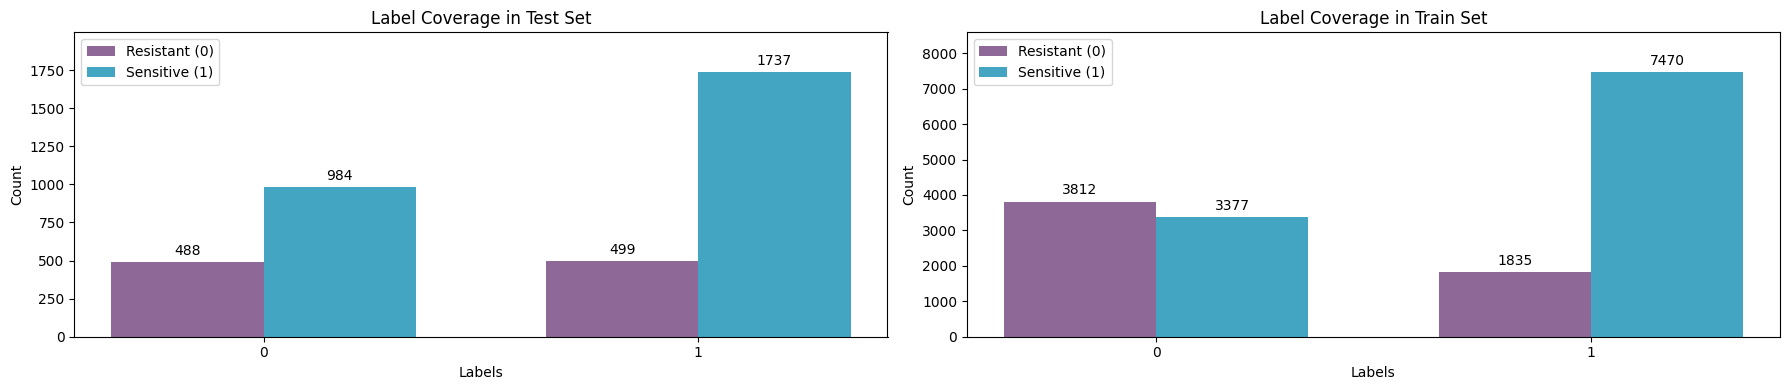


---------- Fold 1/5 ----------


epoch,train_loss,valid_loss,masked_acc,masked_precision,masked_auprc,masked_recall,masked_f1,masked_fbeta,masked_auc,masked_jaccard,masked_hamming,masked_mcc,time
0,0.376079,0.366228,0.600355,0.799517,0.773872,0.358808,0.433153,0.381487,0.664177,0.322017,0.399645,0.160304,00:34
1,0.323057,0.382418,0.461184,0.561845,0.824767,0.261772,0.303220,0.270531,0.721413,0.217453,0.538816,0.209403,00:32
2,0.304541,0.786403,0.782431,0.764443,0.821921,0.805514,0.746813,0.770896,0.724906,0.637877,0.217569,0.195358,00:31
3,0.311615,2.222782,0.418967,0.641264,0.793726,0.700456,0.480784,0.560443,0.700899,0.362772,0.581033,0.043620,00:33
4,0.319692,0.393919,0.461465,0.708521,0.796187,0.388221,0.356870,0.364213,0.687313,0.264031,0.538535,0.220218,00:31
5,0.316290,1.126624,0.670164,0.599007,0.786991,0.909104,0.688526,0.785597,0.688881,0.585468,0.329836,0.091941,00:31
6,0.292082,0.856127,0.519437,0.215929,0.815800,0.284847,0.241596,0.263988,0.702773,0.208127,0.480563,0.017628,00:33
7,0.279997,2.215669,0.489358,0.206146,0.779462,0.287191,0.230236,0.254445,0.662399,0.192871,0.510642,-0.018125,00:32
8,0.267684,1.502558,0.397269,0.319487,0.832629,0.612722,0.394324,0.483846,0.722089,0.310542,0.602731,0.022983,00:32
9,0.261318,2.474244,0.617659,0.605812,0.803508,0.997824,0.714278,0.833106,0.698496,0.605215,0.382341,0.007382,00:32


Better model found at epoch 0 with masked_acc value: 0.6003548114924908.
Better model found at epoch 2 with masked_acc value: 0.782431264866276.


Better model found at epoch 0 with masked_acc value: 0.7644429112194241.



---------- Fold 2/5 ----------


epoch,train_loss,valid_loss,masked_acc,masked_precision,masked_auprc,masked_recall,masked_f1,masked_fbeta,masked_auc,masked_jaccard,masked_hamming,masked_mcc,time
0,0.375996,0.416669,0.661689,0.791297,0.857826,0.806054,0.735751,0.763802,0.683177,0.612700,0.338311,0.133449,00:35
1,0.320017,0.431651,0.544513,0.827139,0.862314,0.484379,0.529693,0.488348,0.682660,0.409262,0.455487,0.188859,00:35
2,0.303237,0.489204,0.374468,0.398283,0.853125,0.297451,0.295489,0.292471,0.661470,0.233044,0.625532,0.090658,00:34
3,0.301526,0.673990,0.497247,0.670729,0.859287,0.489741,0.496238,0.486338,0.709678,0.395967,0.502753,0.115535,00:35
4,0.304831,0.693287,0.514101,0.747462,0.838104,0.682275,0.593829,0.631987,0.664397,0.483072,0.485899,0.035744,00:34
5,0.299766,0.677665,0.763711,0.741426,0.868324,1.000000,0.837097,0.920243,0.724596,0.741426,0.236289,0.011723,00:35
6,0.289638,0.561690,0.449283,0.418230,0.838531,0.580736,0.470338,0.525210,0.689676,0.396883,0.550717,0.039894,00:35
7,0.267961,0.889599,0.652791,0.751712,0.844569,0.814371,0.722267,0.763284,0.707491,0.607161,0.347209,0.071459,00:35
8,0.262581,0.729920,0.323591,0.668478,0.859039,0.258691,0.237188,0.235805,0.701916,0.166720,0.676409,0.056901,00:35
9,0.250188,0.486052,0.558460,0.807417,0.840843,0.656610,0.605833,0.621099,0.653342,0.493343,0.441540,0.163260,00:35


Better model found at epoch 0 with masked_acc value: 0.6616891284742884.
Better model found at epoch 5 with masked_acc value: 0.7637105637384881.
Better model found at epoch 22 with masked_acc value: 0.821677313325831.
Better model found at epoch 23 with masked_acc value: 0.8265519911993211.
Better model found at epoch 27 with masked_acc value: 0.840435476640901.


Better model found at epoch 0 with masked_acc value: 0.8318375372919211.



---------- Fold 3/5 ----------


epoch,train_loss,valid_loss,masked_acc,masked_precision,masked_auprc,masked_recall,masked_f1,masked_fbeta,masked_auc,masked_jaccard,masked_hamming,masked_mcc,time
0,0.379403,0.438652,0.706298,0.733350,0.776411,0.696432,0.689277,0.686176,0.677052,0.580525,0.293702,0.178817,00:33
1,0.316485,1.207312,0.641913,0.557473,0.774744,0.719245,0.605264,0.655300,0.668962,0.565611,0.358087,0.122679,00:33
2,0.293701,2.854589,0.616023,0.465833,0.781228,0.400292,0.397657,0.397033,0.685910,0.389606,0.383977,0.005884,00:34
3,0.301808,0.969333,0.459185,0.354764,0.785244,0.302138,0.293653,0.290822,0.662348,0.272702,0.540815,0.081352,00:33
4,0.304441,0.535521,0.583656,0.627183,0.789451,0.737828,0.614369,0.670114,0.688129,0.564126,0.416344,0.112363,00:34
5,0.286420,1.439313,0.551426,0.516354,0.765422,0.780450,0.596771,0.677607,0.607856,0.511386,0.448574,-0.001539,00:32
6,0.265743,2.836888,0.370235,0.405994,0.778273,0.327747,0.274451,0.297353,0.670314,0.243834,0.629765,0.047378,00:33
7,0.250794,0.441632,0.738206,0.710731,0.796725,0.790292,0.727214,0.756468,0.714925,0.660334,0.261794,0.151630,00:33
8,0.242129,2.186556,0.541360,0.477518,0.766472,0.422808,0.393471,0.402519,0.681814,0.353270,0.458640,0.027360,00:33
9,0.231783,2.639271,0.460692,0.317577,0.780940,0.179152,0.179464,0.177691,0.699409,0.194221,0.539308,0.022712,00:33


Better model found at epoch 0 with masked_acc value: 0.7062975999233841.
Better model found at epoch 7 with masked_acc value: 0.7382057832030682.
Better model found at epoch 13 with masked_acc value: 0.749214980378173.
Better model found at epoch 24 with masked_acc value: 0.7585464449925611.
Better model found at epoch 25 with masked_acc value: 0.7859176221907782.


Better model found at epoch 0 with masked_acc value: 0.7670194170766973.



---------- Fold 4/5 ----------


epoch,train_loss,valid_loss,masked_acc,masked_precision,masked_auprc,masked_recall,masked_f1,masked_fbeta,masked_auc,masked_jaccard,masked_hamming,masked_mcc,time
0,0.363030,0.456576,0.663563,0.682980,0.783733,0.783974,0.692077,0.724918,0.736198,0.590088,0.336437,0.264160,00:32
1,0.297441,1.050887,0.613055,0.405647,0.800819,0.320827,0.320927,0.319196,0.761279,0.320757,0.386945,0.116936,00:33
2,0.289011,1.047823,0.642408,0.452241,0.807046,0.546610,0.455015,0.500719,0.778456,0.409886,0.357592,0.037277,00:32
3,0.307366,1.587191,0.635882,0.644897,0.730488,0.837954,0.659474,0.736964,0.659198,0.563664,0.364118,0.078597,00:33
4,0.326614,0.734195,0.570951,0.519241,0.694477,0.631028,0.512875,0.558713,0.607488,0.425132,0.429049,0.072165,00:32
5,0.309233,1.116295,0.379641,0.094354,0.753954,0.175227,0.107959,0.134937,0.662191,0.097756,0.620359,-0.004457,00:32
6,0.288942,1.499233,0.638243,0.452741,0.668649,0.618137,0.501862,0.557832,0.586402,0.458443,0.361757,0.085881,00:32
7,0.278604,2.088693,0.400870,0.000000,0.748526,0.000000,0.000000,0.000000,0.701306,0.044424,0.599130,0.000000,00:32
8,0.274268,0.562980,0.484314,0.288411,0.754410,0.433742,0.319506,0.366698,0.722700,0.285734,0.515686,0.002140,00:33
9,0.256389,2.173996,0.620297,0.506032,0.783003,0.779116,0.593426,0.678423,0.734179,0.534300,0.379703,0.004411,00:32


Better model found at epoch 0 with masked_acc value: 0.6635630420930184.
Better model found at epoch 14 with masked_acc value: 0.706965235083923.
Better model found at epoch 22 with masked_acc value: 0.781650522029935.
Better model found at epoch 27 with masked_acc value: 0.7909231172673739.
Better model found at epoch 28 with masked_acc value: 0.8012280091264081.


Better model found at epoch 0 with masked_acc value: 0.8105505193688831.



---------- Fold 5/5 ----------


epoch,train_loss,valid_loss,masked_acc,masked_precision,masked_auprc,masked_recall,masked_f1,masked_fbeta,masked_auc,masked_jaccard,masked_hamming,masked_mcc,time
0,0.402793,0.451442,0.622787,0.761582,0.744310,0.687059,0.679202,0.673828,0.675354,0.540558,0.377213,0.140088,00:31
1,0.339820,0.706313,0.721655,0.724084,0.773689,0.968867,0.803149,0.881956,0.730105,0.710946,0.278345,0.041470,00:33
2,0.323503,0.852373,0.632867,0.717244,0.792386,0.835779,0.700448,0.760153,0.763775,0.602796,0.367133,0.163714,00:31
3,0.340730,1.095193,0.453620,0.470207,0.747614,0.276488,0.271168,0.267843,0.675124,0.231211,0.546380,0.059568,00:32
4,0.329694,2.935117,0.332601,0.455082,0.658124,0.517862,0.372226,0.436285,0.606541,0.286320,0.667399,-0.000267,00:32
5,0.328050,0.703488,0.795321,0.818837,0.761204,0.759767,0.747549,0.748457,0.728495,0.664253,0.204679,0.107817,00:31
6,0.351092,0.859171,0.589476,0.560312,0.752779,0.806254,0.639974,0.719336,0.706817,0.558856,0.410524,-0.000384,00:33
7,0.310027,0.534766,0.583581,0.773652,0.795050,0.442811,0.527117,0.468360,0.760245,0.413837,0.416419,0.202716,00:31
8,0.295415,0.457391,0.314064,0.271146,0.770324,0.505266,0.341163,0.416544,0.729881,0.269067,0.685936,-0.005562,00:31
9,0.289199,0.605508,0.412407,0.365702,0.772919,0.342245,0.339053,0.337046,0.750513,0.273338,0.587593,0.140498,00:32


Better model found at epoch 0 with masked_acc value: 0.6227871610843363.
Better model found at epoch 1 with masked_acc value: 0.7216549847174971.
Better model found at epoch 5 with masked_acc value: 0.7953207738591597.


epoch,train_loss,valid_loss,masked_acc,masked_precision,masked_auprc,masked_recall,masked_f1,masked_fbeta,masked_auc,masked_jaccard,masked_hamming,masked_mcc,time
0,0.402793,0.451442,0.622787,0.761582,0.744310,0.687059,0.679202,0.673828,0.675354,0.540558,0.377213,0.140088,00:31
1,0.339820,0.706313,0.721655,0.724084,0.773689,0.968867,0.803149,0.881956,0.730105,0.710946,0.278345,0.041470,00:33
2,0.323503,0.852373,0.632867,0.717244,0.792386,0.835779,0.700448,0.760153,0.763775,0.602796,0.367133,0.163714,00:31
3,0.340730,1.095193,0.453620,0.470207,0.747614,0.276488,0.271168,0.267843,0.675124,0.231211,0.546380,0.059568,00:32
4,0.329694,2.935117,0.332601,0.455082,0.658124,0.517862,0.372226,0.436285,0.606541,0.286320,0.667399,-0.000267,00:32
5,0.328050,0.703488,0.795321,0.818837,0.761204,0.759767,0.747549,0.748457,0.728495,0.664253,0.204679,0.107817,00:31
6,0.351092,0.859171,0.589476,0.560312,0.752779,0.806254,0.639974,0.719336,0.706817,0.558856,0.410524,-0.000384,00:33
7,0.310027,0.534766,0.583581,0.773652,0.795050,0.442811,0.527117,0.468360,0.760245,0.413837,0.416419,0.202716,00:31
8,0.295415,0.457391,0.314064,0.271146,0.770324,0.505266,0.341163,0.416544,0.729881,0.269067,0.685936,-0.005562,00:31
9,0.289199,0.605508,0.412407,0.365702,0.772919,0.342245,0.339053,0.337046,0.750513,0.273338,0.587593,0.140498,00:32


Better model found at epoch 22 with masked_acc value: 0.8212184923896669.
Better model found at epoch 23 with masked_acc value: 0.8528422483524063.
Better model found at epoch 24 with masked_acc value: 0.870480894759933.
Better model found at epoch 26 with masked_acc value: 0.8723059884179825.
Better model found at epoch 27 with masked_acc value: 0.877217763125614.
Better model found at epoch 28 with masked_acc value: 0.883201751287138.


Better model found at epoch 0 with masked_acc value: 0.9100762776569447.


In [ ]:
# ---------- Cross Validation ----------
saved_model_name,saved_metric_name=get_save_paths(model=model,mode=mode,hyperparams=model_hyperparameters_dict,root_models_dir=root_models_dir, best_acc=None)


train_indices = table_df[table_df['clusters'].isin(train_clusters)]['row_index'].tolist()
test_indices  = table_df[table_df['clusters'].isin(test_clusters)]['row_index'].tolist()

train_dataset = Subset(Dataset, train_indices)
test_dataset  = Subset(Dataset,

                       test_indices)

save_split_statistics(train_indices, test_indices, train_clusters, test_clusters, len(Dataset), check_label_coverage, saved_model_name)

results_per_fold = defaultdict(list)
class_results_per_fold = []

all_indices = train_dataset.indices
clusters = [Dataset.clusters[i] for i in all_indices]

if isGeneral:
    species_list = [Dataset.species[i] for i in all_indices]

    strat_group_kfold = StratifiedGroupKFold(n_splits=NUM_FOLDS, shuffle=True, random_state=42)
    fold_enumerate = enumerate(strat_group_kfold.split(X=all_indices, y=species_list, groups=clusters))
else:
    group_kfold = GroupKFold(n_splits=NUM_FOLDS)
    fold_enumerate = enumerate(group_kfold.split(all_indices, groups=clusters))

for fold, (train_idx, val_idx) in fold_enumerate:
    print(f"\n---------- Fold {fold + 1}/{NUM_FOLDS} ----------")

    fold_train_indices = [all_indices[i] for i in train_idx]
    fold_val_indices = [all_indices[i] for i in val_idx]

    train_dataset = Subset(Dataset, fold_train_indices)
    val_dataset   = Subset(Dataset, fold_val_indices)

    dls = DataLoaders.from_dsets(
    train_dataset, val_dataset,
    bs=BATCH_SIZE)

    if isGeneral:
        pos_weights = compute_weights_from_subset(train_dataset, num_classes=NUM_CLASSES)
    else:
        pos_weights = get_pos_weights(train_dataset)

    AMR_Model = create_resnet(NUM_CLASSES=NUM_CLASSES)
    AMR_Model = AMR_Model.to(device)

    callbacks = [MixUp(alpha=0.1) if not isGeneral else None,
                 SaveModelCallback(monitor='masked_acc', fname=f'model_fold_{fold+1}'),
                 CSVLogger(fname=f'{saved_metric_name[:-4]}_fold_{fold+1}.csv'),
                 SpeciesLossUnwrapper() if isGeneral else None,
                 ]

    callbacks = [cb for cb in callbacks if cb is not None]

    learn = Learner(
        dls,
        AMR_Model,
        loss_func = MaskedWeightedBCEBySpecies(pos_weights=pos_weights, num_classes=NUM_CLASSES) if isGeneral else MaskedWeightedBCE(pos_weight = pos_weights),
        metrics=[
            MaskedAccuracyMulti,
            MaskedPrecisionMulti,
            MaskedAUPRCMulti,
            MaskedRecallMulti,
            MaskedF1ScoreMulti,
            MaskedFBetaMulti,
            MaskedRocAucMulti,
            MaskedJaccardMulti,
            MaskedHammingLossMulti,
            MaskedMatthewsCorrCoefMulti
        ],
        cbs = callbacks
    )

    learn.fit_one_cycle(EPOCHS)

    val_results = learn.validate()
    val_loss, *metric_scores = val_results

    results_per_fold['valid_loss'].append(val_loss)

    for metric_name, score in zip(learn.metrics, metric_scores):
        results_per_fold[metric_name.name].append(score)

    preds, targets = learn.get_preds(dl=dls.valid)
    per_class_results = per_class_metric(preds, targets)
    class_results_per_fold.append(per_class_results)


In [ ]:
cross_validation_results = []
for metric_name, scores in results_per_fold.items():
    row = {'Metric': metric_name, 'Mean': np.mean(scores), 'Std': np.std(scores)}
    cross_validation_results.append(row)

cross_validation_results_df = pd.DataFrame(cross_validation_results)
cross_validation_results_df.to_csv(f'{saved_metric_name[:-4]}_metric_summary.csv', index=False, sep=',', header=True, na_rep='N/A')
cross_validation_results_df

,Metric,Mean,Std
0,valid_loss,0.504686,0.158166
1,masked_acc,0.818643,0.038284
2,masked_precision,0.816785,0.053264
3,masked_auprc,0.847971,0.032864
4,masked_recall,0.820061,0.058172
5,masked_f1,0.800663,0.059445
6,masked_fbeta,0.806905,0.059904
7,masked_auc,0.800305,0.046502
8,masked_jaccard,0.718652,0.065532
9,masked_hamming,0.181357,0.038284


In [ ]:
combined_df = pd.concat(class_results_per_fold, keys=range(NUM_FOLDS), names=['fold', 'class'])

# Group by class across folds
mean_per_class = combined_df.groupby('class').mean()
std_per_class = combined_df.groupby('class').std()


In [ ]:
mean_per_class.to_csv(f'{saved_metric_name[:-4]}_mean_per_class.csv', index=True, sep=',', header=True, na_rep='N/A')
mean_per_class

,accuracy,precision,AUPRC,recall,f1,fbeta,roc_auc,jaccard,mcc
class,,,,,,,,,
Gentamicin,0.841187,0.904324,0.943463,0.897733,0.898308,0.897331,0.829858,0.816848,0.466838
Tetracycline,0.805078,0.784122,0.856167,0.803081,0.790858,0.797523,0.872320,0.662352,0.585241


In [ ]:
std_per_class.to_csv(f'{saved_metric_name[:-4]}_std_per_class.csv', index=True, sep=',', header=True, na_rep='N/A')
std_per_class

,accuracy,precision,AUPRC,recall,f1,fbeta,roc_auc,jaccard,mcc
class,,,,,,,,,
Gentamicin,0.044448,0.055666,0.037778,0.069992,0.034543,0.052640,0.096943,0.058165,0.190498
Tetracycline,0.041867,0.073490,0.078737,0.135793,0.098528,0.119921,0.038464,0.127318,0.098217


In [ ]:
learn.save(saved_model_name + "_MixUp0.1" + "_" + architecture + f"_{seed}")

Path('/content/drive/MyDrive/MRSA datasets/Models/Cross Validation/General_batch64_epoch30_MixUp0.1_ResNet_42.pth')

In [ ]:
if isGeneral:
    learn = Learner(
    dls,
    AMR_Model,
    loss_func=MaskedWeightedBCEBySpecies(pos_weights=pos_weights, num_classes=NUM_CLASSES),
    metrics=[
        MaskedAccuracyMulti,
        MaskedPrecisionMulti,
        MaskedRecallMulti,
        MaskedF1ScoreMulti,
        MaskedFBetaMulti,
        MaskedRocAucMulti,
        MaskedJaccardMulti,
        MaskedHammingLossMulti,
        MaskedMatthewsCorrCoefMulti
    ],
    cbs=[SpeciesLossUnwrapper()])
else:
    learn = Learner(
        dls,
        AMR_Model,
        loss_func = MaskedWeightedBCE(pos_weight = pos_weights),
        metrics=[
            MaskedAccuracyMulti,
            MaskedPrecisionMulti,
            MaskedRecallMulti,
            MaskedF1ScoreMulti,
            MaskedFBetaMulti,
            MaskedRocAucMulti,
            MaskedJaccardMulti,
            MaskedHammingLossMulti,
            MaskedMatthewsCorrCoefMulti
        ],
        cbs = [
        SaveModelCallback(monitor = 'masked_acc'),
        ]
    )

In [ ]:
# learn.load('/Salmonella_batch32_epoch19_MixUp0.1_ResNet_42',with_opt=True, weights_only=False)

# Test

### Full Dataset

In [ ]:
test_dl = learn.dls.test_dl(test_dataset)

if isGeneral:
    learn.remove_cb(SaveModelCallback)

metrics = learn.validate(dl=test_dl)

In [ ]:
metric_names = ['loss'] + [m.name for m in learn.metrics]
test=pd.DataFrame([metrics], columns = metric_names)
test.to_csv(saved_metric_name+"test.csv", index=False)
test

,loss,masked_acc,masked_precision,masked_recall,masked_f1,masked_fbeta,masked_auc,masked_jaccard,masked_hamming,masked_mcc
0,0.190123,0.895645,0.935373,0.872669,0.896919,0.880883,0.925814,0.846698,0.104355,0.67319


### Single Sample

In [ ]:
sample_idx = 19
sample = test_dataset[sample_idx]
pred_class, tensor, probs = learn.predict(sample)
print(str(np.multiply(pred_class > 0, 1)))
print(sample[1])

### Evaluating Preformance on each Species (for general model)

,loss,masked_acc,masked_precision,masked_recall,masked_f1,masked_fbeta,masked_auc,masked_jaccard,masked_hamming,masked_mcc
Species,,,,,,,,,,
Staphylococcus aureus,0.246060,0.890142,0.945253,0.878099,0.907513,0.888949,0.905653,0.839285,0.109858,0.625330
Salmonella enterica,0.114646,0.965768,0.962240,0.988730,0.974709,0.982917,0.986301,0.952144,0.034232,0.911047
Escherichia coli,0.159150,0.863747,0.911316,0.788029,0.834689,0.804603,0.909853,0.796475,0.136253,0.612731


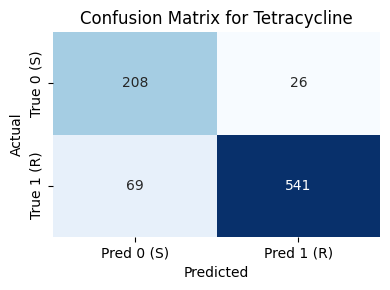

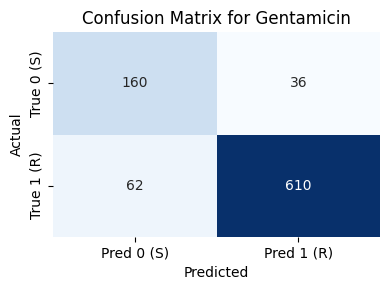

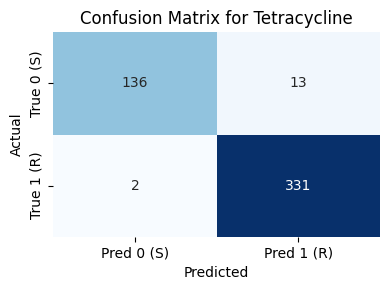

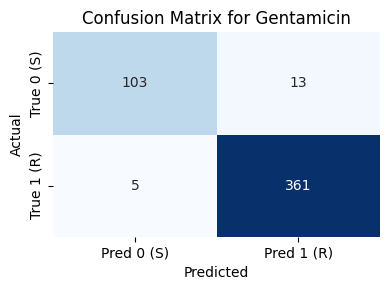

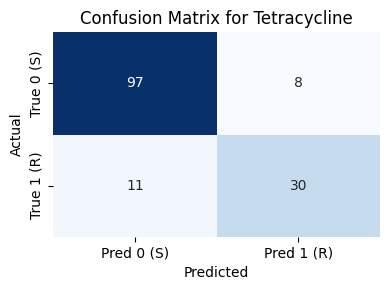

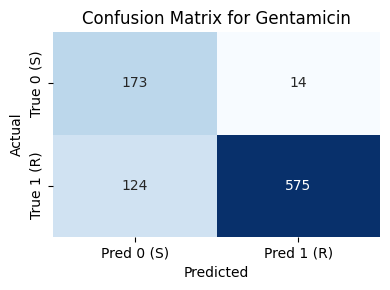

In [ ]:
Master_Table = pd.read_csv(param_dict['table_location'])

# predictions, targets = learn.get_preds(dl = test_loader)
test_rows = Master_Table.iloc[test_dataset.indices]
# test_rows = test_rows['Species']
species = test_rows['Species'].unique()
grouped_rows = test_rows.groupby('Species')
species_metrics = {}
metric_df = {}
metric_names = ['loss'] + [m.name for m in learn.metrics]
master_to_testset_idx = {idx: i for i, idx in enumerate(test_dataset.indices)}

for s in species:
    species_samples = grouped_rows.get_group(s)
    species_indices = list(species_samples.index)
    species_indices = [master_to_testset_idx[i] for i in species_samples.index if i in master_to_testset_idx]

    species_dataset = Subset(test_dataset, species_indices)
    species_dl = learn.dls.test_dl(species_dataset)

    species_metrics[s] = learn.validate(dl=species_dl)
    metric_df[s] = pd.DataFrame([species_metrics[s]], columns = metric_names)
    metric_df[s]['Species'] = s

    preds, targets = learn.get_preds(dl=species_dl)

    if USE_LOGITS:
        preds_binary = _apply_threshold(preds)
        prob_preds = torch.sigmoid(preds)
    else:
        preds_binary = (preds > THRESH).float()
        prob_preds = preds

    cm_result = []
    for i in range(targets.shape[1]):
        true = targets[:,i]
        pred = preds_binary[:,i]

        mask = true != -1
        true = true[mask]
        pred = pred[mask]


        cm = confusion_matrix(true, pred)

        TN, FP = cm[0]
        FN, TP = cm[1]

        cm_result.append({'Drug' : DRUGS[i], 'TN' : TN, 'FP' : FP, 'FN' : FN, 'TP' : TP})

        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Pred 0 (S)', 'Pred 1 (R)'],
                    yticklabels=['True 0 (S)', 'True 1 (R)'])

        plt.title(f'Confusion Matrix for {DRUGS[i]}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        png_save_path = os.path.join(saved_model_name, f'{s}_Confusion_Matrix_{DRUGS[i]}.png')
        plt.savefig(png_save_path, dpi=300, bbox_inches='tight')

    cm_save_path = os.path.join(saved_model_name, f'{s}_Confusion_Matrix.csv')
    cm_df = pd.DataFrame(cm_result)
    total = {'Drug' : 'Total', 'TN' : cm_df['TN'].sum(), 'FP' : cm_df['FP'].sum(), 'FN' : cm_df['FN'].sum(), 'TP' : cm_df['TP'].sum()}
    cm_df = pd.concat([cm_df, pd.DataFrame([total])], ignore_index=True)
    cm_df.to_csv(cm_save_path, index=False, sep=',', header=True, na_rep='N/A')

all_species_metric = pd.concat(metric_df, ignore_index=True)
all_species_metric.set_index('Species', inplace=True)
all_species_metric

In [ ]:
all_species_metric.to_csv(saved_metric_name+"test_species_all.csv", index=True )

### Per Label Evaluation

In [ ]:
preds, targets = learn.get_preds(dl=test_dl)

if USE_LOGITS:
    preds_binary = _apply_threshold(preds)
    prob_preds = torch.sigmoid(preds)
else:
    preds_binary = (preds > THRESH).float()
    prob_preds = preds

In [ ]:
# Dictionary of metric name -> (function, uses probabilities or not)
metric_funcs = {
    'accuracy': (masked_accuracy_per_class_detailed, False),
    'precision': (precision_score, False),
    'recall': (recall_score, False),
    'f1': (f1_score, False),
    'fbeta': (fbeta_score, False),
    'roc_auc': (safe_roc_auc, True),
    'jaccard': (safe_jaccard, False),
    'mcc': (safe_mcc, False)
}

# Collect per-class results
per_class_results = {}

for name, (fn, is_prob) in metric_funcs.items():
    if name == 'accuracy':
        per_class_results[name] = fn(preds, targets)
    else:
        input_tensor = prob_preds if is_prob else preds_binary
        if name == 'fbeta':
            scores = _masked_metric_per_class_detailed(input_tensor, targets, fn, beta=2.0, is_prob=is_prob)
        else:
            scores = _masked_metric_per_class_detailed(input_tensor, targets, fn, is_prob=is_prob)
        per_class_results[name] = scores


In [ ]:
per_class_df = pd.DataFrame(per_class_results)
per_class_df.index.name = 'class'
per_class_df.to_csv(saved_metric_name[:-4] + "_test_per_class_metrics.csv")
per_class_df

,accuracy,precision,recall,f1,fbeta,roc_auc,jaccard,mcc
class,,,,,,,,
Tetracycline,0.912364,0.950474,0.916667,0.933264,0.923234,0.959653,0.874879,0.806911
Gentamicin,0.886404,0.960845,0.890040,0.924088,0.903354,0.948683,0.858889,0.707964


### Confusion Matrices

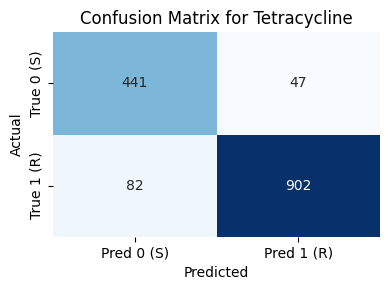

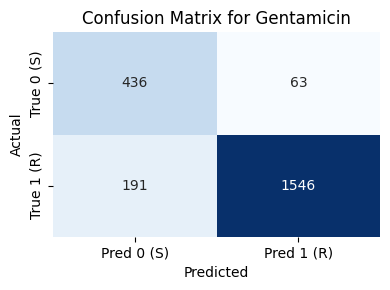

In [ ]:
cm_result = []
for i in range(targets.shape[1]):
    true = targets[:,i]
    pred = preds_binary[:,i]

    mask = true != -1
    true = true[mask]
    pred = pred[mask]


    cm = confusion_matrix(true, pred)

    TN, FP = cm[0]
    FN, TP = cm[1]

    cm_result.append({'Drug' : DRUGS[i], 'TN' : TN, 'FP' : FP, 'FN' : FN, 'TP' : TP})

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred 0 (S)', 'Pred 1 (R)'],
                yticklabels=['True 0 (S)', 'True 1 (R)'])

    plt.title(f'Confusion Matrix for {DRUGS[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    png_save_path = os.path.join(saved_model_name, f'Confusion_Matrix_{DRUGS[i]}.png')
    plt.savefig(png_save_path, dpi=300, bbox_inches='tight')
    plt.show()

cm_df = pd.DataFrame(cm_result)
total = {'Drug' : 'Total', 'TN' : cm_df['TN'].sum(), 'FP' : cm_df['FP'].sum(), 'FN' : cm_df['FN'].sum(), 'TP' : cm_df['TP'].sum()}
cm_df = pd.concat([cm_df, pd.DataFrame([total])], ignore_index=True)
cm_save_path = os.path.join(saved_model_name, 'Confusion_Matrix.csv')
cm_df.to_csv(cm_save_path, index=False, sep=',', header=True, na_rep='N/A')